# Data-Driven Medical Cost Predictions to Support Strategic Pricing

Image

## Table of Contents

Introducion

Loading and Examining the Data

Distribution of Numerical Features

Distribution of Categorical Features

Feature Selection

Building The Linear Regression Model

Residual Diagnostics

Final Model Evaluation

Plot Actual vs Predicted Values

Conclusion

## Introduction

This project aims to predict individual medical insurance charges using a supervised regression model, enabling insurers to make more informed pricing and underwriting decisions. The analysis is based on the Medical Cost dataset, which includes features such as age, BMI, smoking status, and region. The primary goal is to understand how these factors influence medical costs and to build a predictive model that captures these relationships effectively.

To achieve this, I applied data preprocessing, feature engineering, and log-transformation of the target variable to reduce skewness. I trained and evaluated several regression models, ultimately selecting the one with the best generalization performance based on log-scale RMSE and R² scores. Model performance was validated on a separate test set and visualized to confirm predictive accuracy.

The final model achieved an R² of 0.80 on the test set (log scale), indicating strong explanatory power. Key drivers of cost included smoking status, age, and BMI. These results show that a relatively simple regression model can provide actionable predictions to support strategic pricing in health insurance.


## Loading and Examining the Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('insurance.csv')

# Display dataset overview
display(df.head())
print("="*43)
print(" MEDICAL INSURANCE COSTS DATASET OVERVIEW ")
print("="*43, "\n")
print(df.info(), "\n")
print("="*43)
print(" DATA SUMMARY ")
print("="*43, "\n")
print(df.describe(), "\n")
print("="*43)
print(" MISSING VALUES ")
print("="*43, "\n")
print(df.isnull().sum(), "\n")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 MEDICAL INSURANCE COSTS DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

 DATA SUMMARY 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000


# Dataset Overview

This dataset contains information on individual medical insurance costs and relevant demographic and personal characteristics. The goal is to build a predictive model to estimate medical expenses based on these factors.

## Dataset Columns

- **age**: Age of the primary beneficiary.
- **sex**: Gender of the insurance policyholder (`male`, `female`).
- **bmi**: Body Mass Index (BMI), a measure of body fat based on height and weight. A healthy BMI typically falls between 18.5 and 24.9.
- **children**: Number of dependents covered by the health insurance policy.
- **smoker**: Smoking status of the beneficiary (`yes`, `no`).
- **region**: Geographic location of the beneficiary in the U.S. (`northeast`, `southeast`, `southwest`, `northwest`).
- **charges**: The total medical costs billed to health insurance.

## Dataset Summary

- **Total records**: 1,338 entries  
- **Missing values**: None  
- **Numerical Features**:
  - **Age**: Ranges from 18 to 64, with an average of ~39 years.
  - **BMI**: Varies between 15.96 and 53.13, with an average of ~30.66.
  - **Children**: Number of dependents ranges from 0 to 5.
  - **Charges**: Medical expenses range from \\$1,121.87 to \\$63,770.43, with an average of ~$13,270.

## Observations

- The dataset is free of missing values.
- The `bmi` column has a wide range, which may indicate potential outliers.
- The `charges` column is highly variable, suggesting that different factors (e.g., smoking, age, BMI) might significantly impact medical costs.


## Distribution of Numerical Features

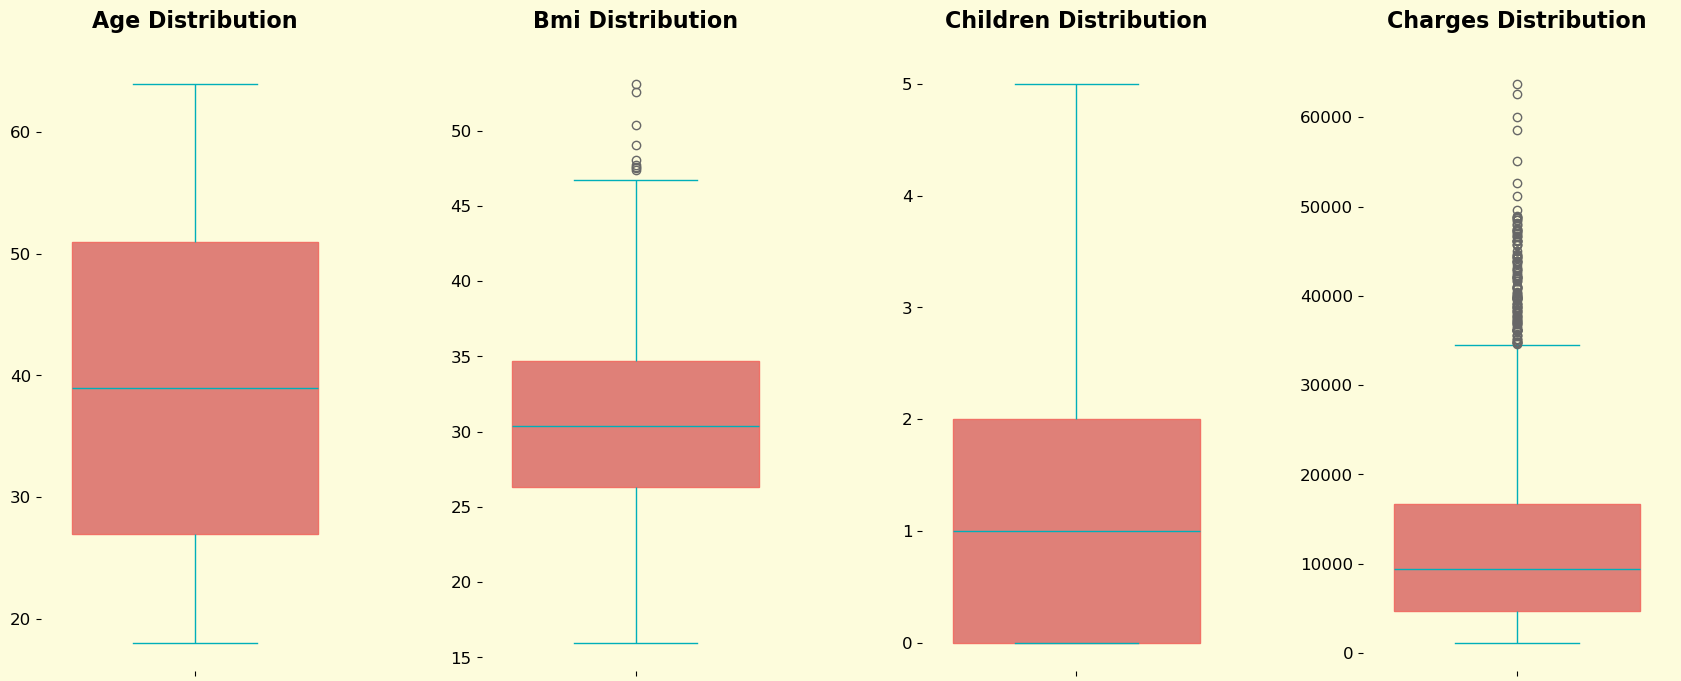

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Custom plot style
plt.rcParams.update({
    "axes.facecolor": "#FDFCDC",
    "figure.facecolor": "#FDFCDC",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelpad": 14,
})

# Define numerical columns
numerical_columns = ["age", "bmi", "children", "charges"]

# Set up the subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(18, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='#F07167', 
                boxprops=dict(edgecolor="#F07167"), medianprops=dict(color="#00AFB9"), 
                whiskerprops=dict(color="#00AFB9"), capprops=dict(color="#00AFB9"))
    
    ax.set_title(f'{col.title()} Distribution', pad=20)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(False)

    # Remove grid borders
    sns.despine(bottom=True, left=True)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

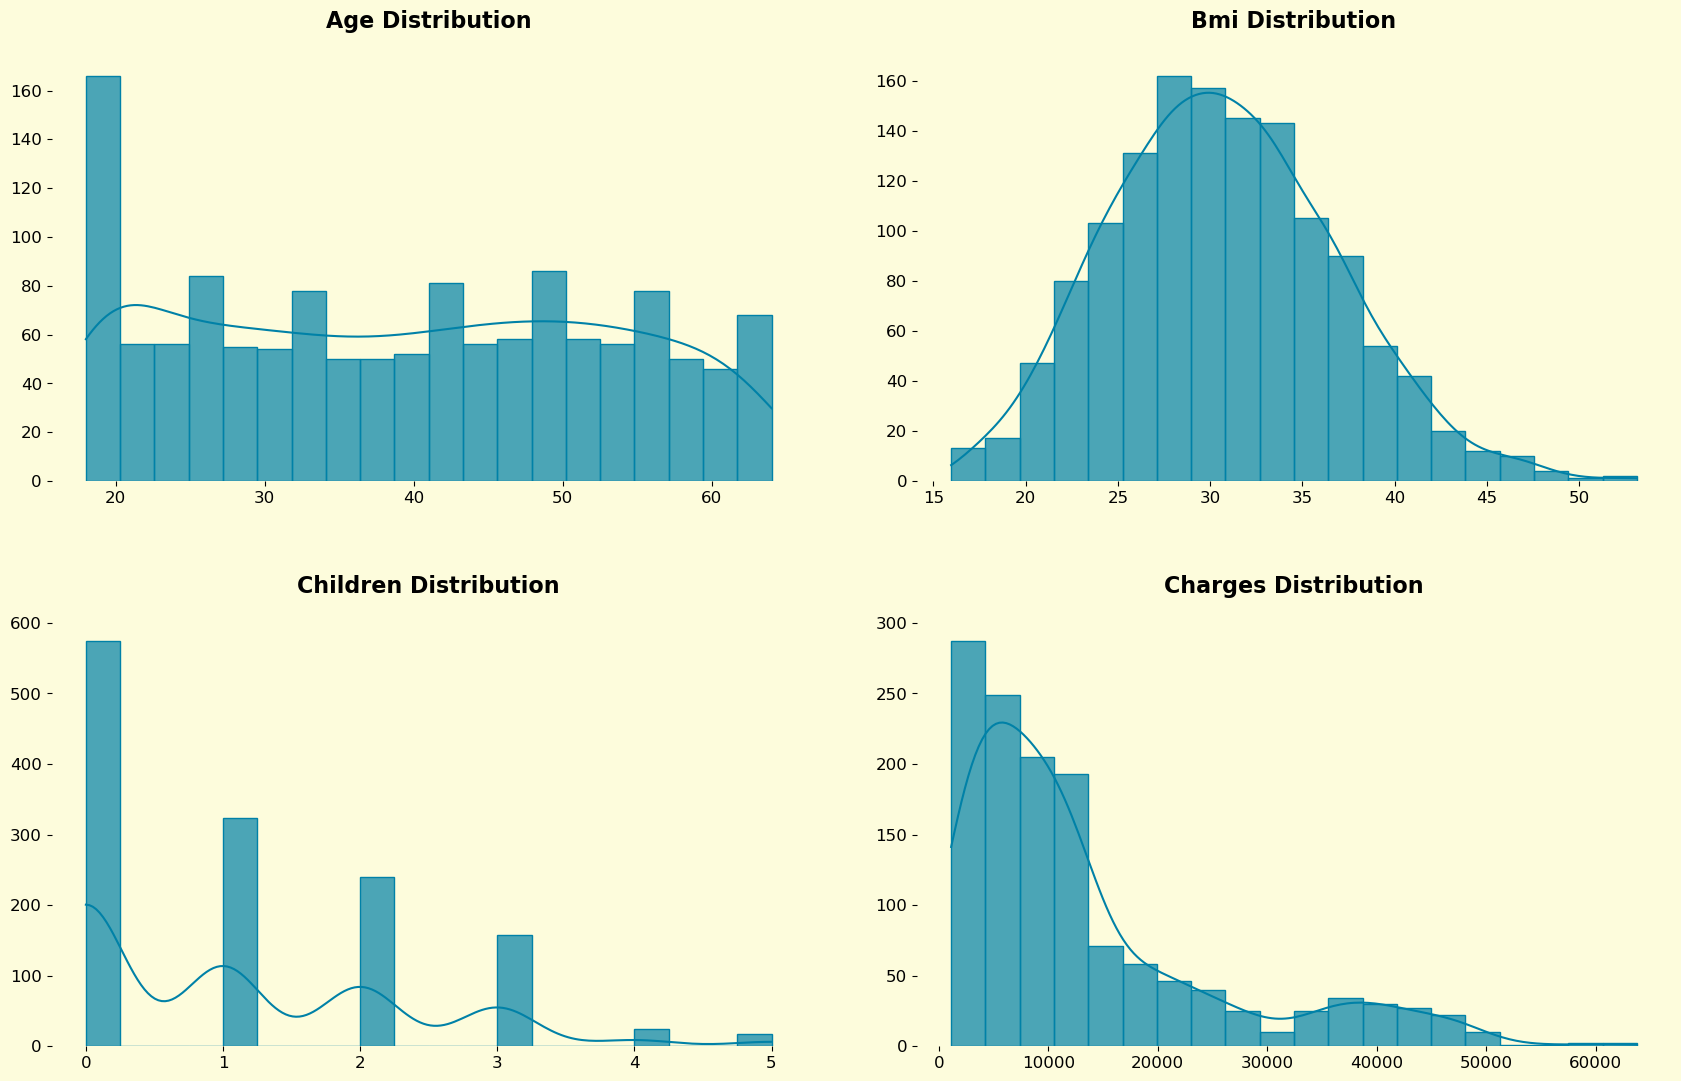

In [6]:
# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Flatten the axes array for easy iteration
ax = axes.flat  # Use .flat to iterate over a 2D array

# Plot histogram for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=20, kde=True, color='#0081A7', edgecolor='#0081A7', alpha=0.7, ax=ax[i])
    
    ax[i].set_title(f'{col.title()} Distribution', pad=20)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].grid(False)

    # Remove grid borders
    sns.despine(bottom=True, left=True)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

# Numerical Features Distribution Analysis

## Age Distribution
The dataset contains individuals ranging from **18 to 64 years old**. The most common age group is **18-22 years**, with **222 individuals**, followed by those aged **45-50 years** (**144 individuals**). The age distribution appears fairly balanced across different age groups, but there is a slight concentration of younger individuals.

## BMI Distribution
The **Body Mass Index (BMI)** values range from **15.92 to 53.13**. Most individuals have a BMI between **27.1 and 30.8** (**319 individuals**), followed by the **30.8 to 34.5** range (**288 individuals**). There is a right skew in the distribution, with fewer individuals having extremely high BMI values.

## Number of Children
The majority of individuals have **0 children** (**574 individuals**), and **1 child** is the next most common (**324 individuals**). The number of dependents decreases as the count increases, with very few individuals having **4 or 5 children**.

## Charges Distribution
The **medical charges** are highly skewed, ranging from **\\$1,059 to \$63,770**. About **40% of individuals** fall within the **lowest charge range (\\$1,059 - \$7,386)**. A significant portion of the population has medical costs below **$20,000**, while a smaller group incurs much higher expenses, likely influenced by factors such as smoking or chronic conditions.


## Distribution of Categorical Features

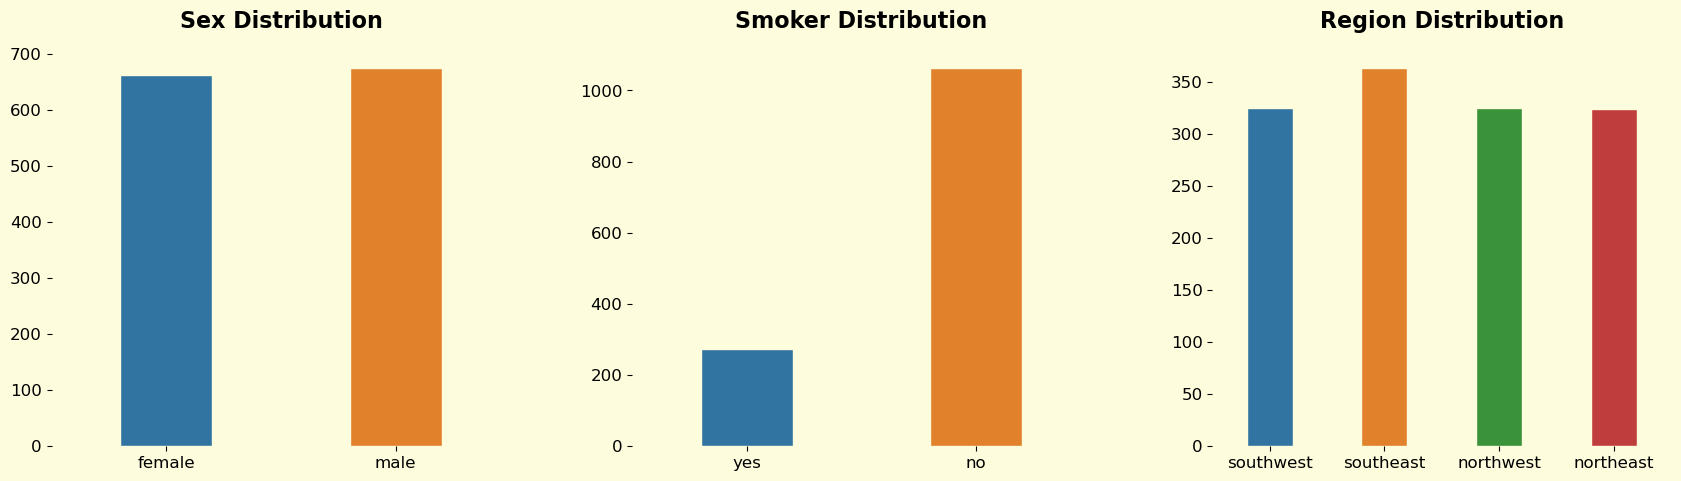

In [8]:
# Define categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette="tab10",
                  hue=col, edgecolor='#FDFCDC', width=.4)
    
    ax.set_title(f'{col.title()} Distribution', pad=15)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(False)

    # Remove grid borders
    sns.despine(bottom=True, left=True)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

## Categorical Feature Distributions

The dataset includes three categorical features: `sex`, `smoker`, and `region`.

- **Sex**: The distribution between male and female beneficiaries is nearly equal, with 676 males and 662 females. This balance suggests no immediate gender bias in the dataset.

- **Smoker**: A majority of the individuals are non-smokers (1064), while a smaller portion (274) are smokers. This imbalance is useful when exploring the impact of smoking on insurance charges.

- **Region**: The data is evenly spread across the four US regions — Southeast (364), Southwest (325), Northwest (325), and Northeast (324). This uniform regional distribution ensures that geographic location does not overly skew the results.

## Feature Selection

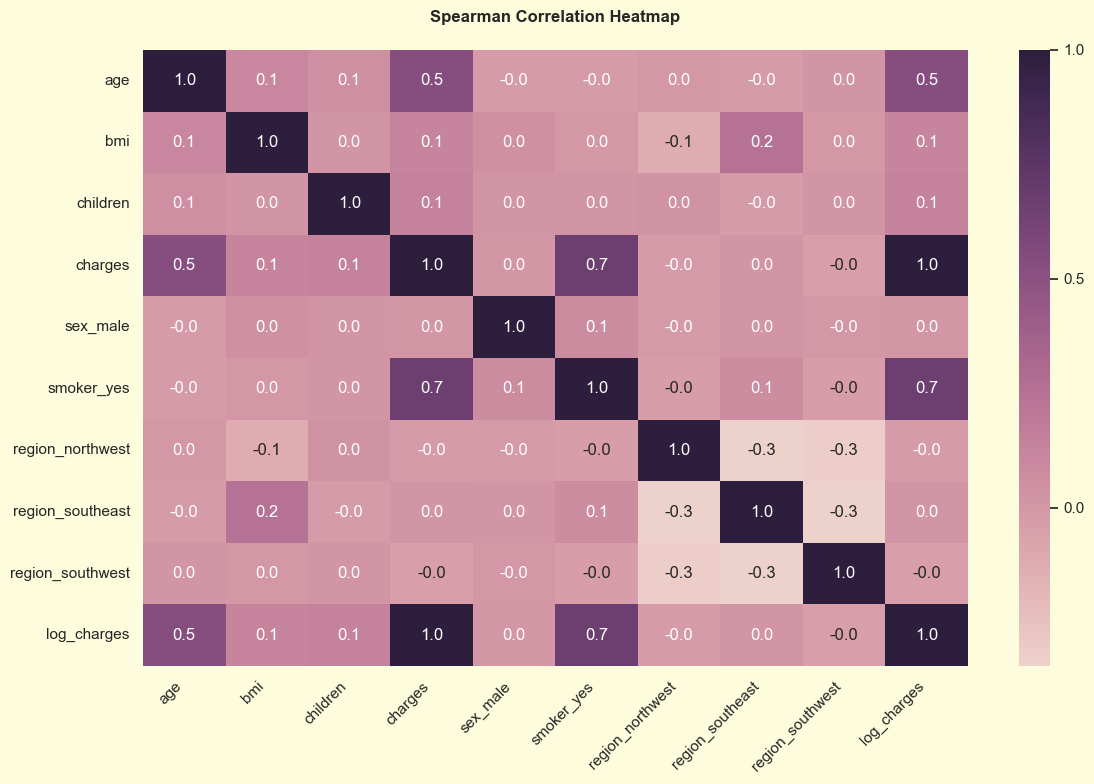

In [10]:
# One-hot encode categorical features (drop_first avoids dummy trap)
df_encoded = pd.get_dummies(df, drop_first=True)

# Log-transform 'charges' to compress the range, pull in extreme values and make the distribution more symmetric.
df_encoded['log_charges'] = np.log(df_encoded['charges'])

# Compute Spearman correlation
corr_matrix = df_encoded.corr(method='spearman')

# Plot settings
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Draw the heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=True,
    linewidths=0,
    linecolor="#1a1a1a",
    fmt=".1f",
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]}
)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.title("Spearman Correlation Heatmap", pad=20)
plt.tight_layout()
plt.show()

## Correlation Analysis with Respect to Medical Charges

The Spearman correlation coefficients between the predictor variables and the target variable `charges` reveal some useful patterns:

- **smoker_yes (0.66)**: This is the strongest positive correlation in the dataset. Individuals who smoke tend to incur much higher medical charges. This aligns with known medical costs associated with smoking-related conditions.
- **age (0.53)**: Age has a strong positive correlation with charges, indicating that older individuals generally have higher medical expenses, possibly due to increased risk of chronic diseases.
- **children (0.13)** and **bmi (0.12)**: These features show weak positive correlations. While the relationships are not strong, they may still contribute marginally to the prediction model.
- **sex_male (0.01)** and **region_* variables (~0.02 or lower)**: These features show negligible correlation with charges. Their predictive value is likely minimal.

### Selected Predictors for the Model

Based on the correlation strengths and domain understanding, the following predictors will be used in our model:

- `smoker_yes`: Strongest indicator of increased charges.
- `age`: Captures the age-related risk factor in medical costs.
- `bmi`: Though weak, BMI is a clinically relevant factor in health expenditure.
- `children`: Adds slight predictive value, potentially reflecting family-related healthcare costs.

The variables related to **sex** and **region** are excluded due to their near-zero correlation with the target. Including them could introduce unnecessary noise without improving model performance.


In [12]:
# Boolean to int conversion 
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,log_charges
0,19,27.900,0,16884.92400,0,1,0,0,1,9.734176
1,18,33.770,1,1725.55230,1,0,0,1,0,7.453302
2,28,33.000,3,4449.46200,1,0,0,1,0,8.400538
3,33,22.705,0,21984.47061,1,0,1,0,0,9.998092
4,32,28.880,0,3866.85520,1,0,1,0,0,8.260197


## Building The Linear Regression Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define selected predictors for the model
selected_features = ['age', 'bmi', 'children', 'smoker_yes']

# Define X and y
X = df_encoded[selected_features]
y = df_encoded['log_charges']

# Divide up the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Examine the regression coefficients
coefficients = pd.Series(model.coef_, index=X_train.columns)
intercept = model.intercept_

print("Intercept:", round(intercept, 2))
print("\nCoefficients:")
print(coefficients.round(2))

# Coefficient of determination (R^2)
r2_train = model.score(X_train, y_train)
print(f"\nR² (Training set): {r2_train:.3f}")

# Mean Squared Error on training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Training set): {mse_train:.2f}")

Intercept: 6.99

Coefficients:
age           0.03
bmi           0.01
children      0.09
smoker_yes    1.54
dtype: float64

R² (Training set): 0.752
Mean Squared Error (Training set): 0.21


## Linear Regression Model Analysis (Log-Transformed Charges)

### Model Coefficients

| Feature        | Coefficient | Interpretation |
|----------------|-------------|----------------|
| **Intercept**  | 6.99        | Baseline log-charge when all predictors are zero. Serves as the base level in the log-linear model. |
| **age**        | +0.03       | Each additional year increases expected medical charges by approximately **3%**, holding other variables constant. |
| **bmi**        | +0.01       | Each unit increase in BMI is associated with a **1%** increase in expected medical charges. |
| **children**   | +0.09       | Each additional child increases expected charges by about **9%**. |
| **smoker_yes** | +1.54       | Smokers are expected to have **154%** higher medical charges than non-smokers, all else equal. |

All coefficients are interpretable as **percentage changes** in the original (non-log) medical charges.

---

### Model Fit: Coefficient of Determination (R²)

- **R² = 0.752**
- The model explains **75.2%** of the variation in log-transformed medical charges.
- This indicates a strong linear relationship between the predictors and the log of charges.

---

### Error Metric: Mean Squared Error (MSE)

- **MSE = 0.21**
- This is the average squared difference between predicted and actual log-charges.
- A lower MSE reflects better predictive accuracy on the training set.


## Residual Diagnostics

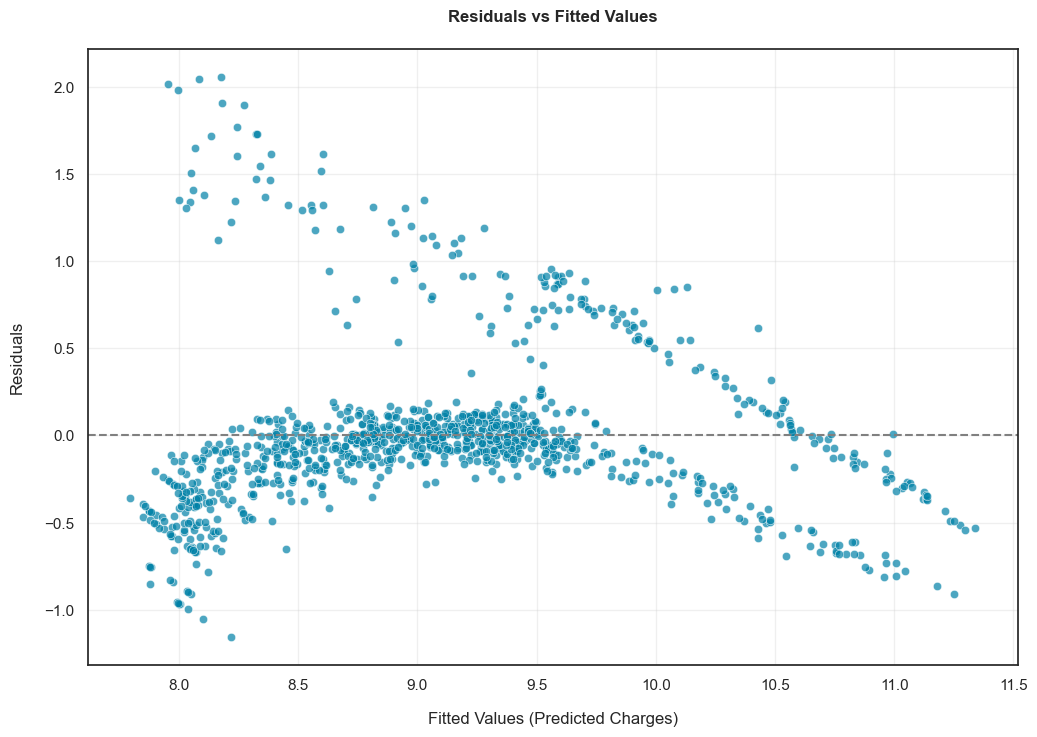

In [17]:
# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals vs fitted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_train_pred, y=residuals, color='#0081A7', edgecolor='white', alpha=0.7)

# Add a horizontal line at y=0 for reference
plt.axhline(0, linestyle='--', color='gray')

# Labels and title
plt.title('Residuals vs Fitted Values', pad=20)
plt.xlabel('Fitted Values (Predicted Charges)')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)

plt.show()

## Residual Analysis of the Linear Regression Model

- The residuals appear to be symmetrically distributed around 0. The most frequent bins are near 0, and the distribution gradually thins out in both positive and negative directions, which is what we expect from a well-fitted linear model.

- The residuals show a consistent spread across the fitted values with a slight funneling effect. While some moderate heteroscedasticity may be present, it is not severe. The vast majority of residuals fall within the range of approximately -0.6 to +0.6.

- No obvious trends appear between the residuals and any of the predictors. This suggests the model captures the linear relationships between the predictors and log-transformed charges adequately.

---

### Summary

The residuals meet key linear regression assumptions:
- Centered around 0 ✔️  
- Reasonably constant variance ✔️  
- No clear trends with predictors ✔️  

## Interpreting The Model

### Does the intercept have a meaningful interpretation?

In the context of this linear regression model, the intercept represents the predicted log-transformed medical charges when all predictor variables are set to zero. However, the intercept value of **6.99** doesn't have a meaningful or realistic interpretation when taken literally, since setting predictors like age, BMI, and smoking status to zero does not correspond to a valid scenario in the real world (e.g., age cannot be zero, BMI would not be realistically zero, and a patient cannot be both a smoker and a non-smoker).

### How should we interpret the intercept?

From a practical perspective, the intercept provides a baseline or starting point for the model's predictions. It establishes the point from which the influence of the other predictors (like age, BMI, number of children, and smoking status) is added or subtracted. While the exact value is not meaningful on its own, it helps the model calculate the predicted medical costs when considering various combinations of predictor values.

For hospital administrators, this baseline can inform resource allocation strategies, but it's crucial to focus on the coefficients for the predictors to make actionable decisions. The intercept can be thought of as the "starting point" for any patient who has a minimal or baseline set of attributes, but it is the predictors that will drive significant changes in the predicted medical costs.

### Interpretation of Regression Coefficients

In this model, each regression coefficient represents how much the **log-transformed medical charges** are expected to change for a one-unit change in the corresponding predictor, while holding all other predictors constant. Here’s how to interpret each predictor's coefficient:

#### 1. **Age**: 0.03
- **Interpretation**: For each additional year of age, the predicted log-transformed medical charge increases by **0.03**. This means older patients, on average, tend to have higher medical charges. This effect is relatively small but could accumulate over a larger age range.
  
#### 2. **BMI**: 0.01
- **Interpretation**: For each one-unit increase in BMI, the predicted log-transformed medical charge increases by **0.01**. This suggests that individuals with higher BMI values tend to have slightly higher medical costs, though the effect is also modest.
  
#### 3. **Children**: 0.09
- **Interpretation**: For each additional child in the household, the predicted log-transformed medical charge increases by **0.09**. This indicates that families with more children might have slightly higher medical costs, possibly due to increased healthcare needs or insurance coverage requirements.
  
#### 4. **Smoker (Yes)**: 1.54
- **Interpretation**: Being a smoker (compared to non-smokers) increases the predicted log-transformed medical charge by **1.54**. This is the largest effect in the model and reflects the well-known higher medical costs associated with smoking, likely due to the increased risk of smoking-related health conditions.

---

These coefficients give us insights into how different factors are expected to impact medical costs, allowing hospital administrators or healthcare providers to adjust resources or intervention strategies accordingly. While these coefficients are useful for prediction, it’s important to remember that they should not be used to infer causal relationships or statistical significance without further analysis.


## Final Model Evaluation

In [20]:
# Predictions on the test set (in log scale) 
y_pred_log = model.predict(X_test)

# Metrics in log scale 
mae_log = mean_absolute_error(y_test, y_pred_log)
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test, y_pred_log)

print("Log-Scale Metrics")
print(f"MAE:  {mae_log:.4f}")
print(f"MSE:  {mse_log:.4f}")
print(f"RMSE: {rmse_log:.4f}")
print(f"R²:   {r2_log:.4f}")

# Inverse transform for original scale 
y_test_orig = np.exp(y_test)
y_pred_orig = np.exp(y_pred_log)

# Metrics in original scale (dollars) 
mae_orig = mean_absolute_error(y_test_orig, y_pred_orig)
mse_orig = mean_squared_error(y_test_orig, y_pred_orig)
rmse_orig = np.sqrt(mse_orig)
r2_orig = r2_score(y_test_orig, y_pred_orig)

print("\nOriginal-Scale Metrics (Dollars)")
print(f"MAE:  ${mae_orig:,.2f}")
print(f"MSE:  ${mse_orig:,.2f}")
print(f"RMSE: ${rmse_orig:,.2f}")
print(f"R²:   {r2_orig:.4f}")

Log-Scale Metrics
MAE:  0.2771
MSE:  0.1832
RMSE: 0.4280
R²:   0.7963

Original-Scale Metrics (Dollars)
MAE:  $3,940.98
MSE:  $59,221,976.91
RMSE: $7,695.58
R²:   0.6185


## Test Set Performance Analysis

When evaluating a model trained on log-transformed charges, the most meaningful metrics are those computed in the **log scale**, as they reflect the space where the model was optimized.

The table below compares the model's performance on the training and test sets across both the **log scale** and **original scale** (dollars). While original-scale metrics help interpret real-world outcomes, **log-scale metrics should be used to judge the model’s accuracy and generalization.**

| Metric   | Training Set (Log Scale) | Test Set (Log Scale) | Test Set (Original Scale)  |
|----------|--------------------------|-----------------------|-----------------------------|
| **MAE**  | 0.29                     | 0.28                  | **\$3,940.98**              |
| **MSE**  | 0.21                     | 0.18                  | **\$59,221,976.91**         |
| **RMSE** | 0.46                     | 0.43                  | **\$7,695.58**              |
| **R²**   | 0.752                    | 0.796                 | **0.6185**                  |

The **Mean Squared Error (MSE)** on the test set in log scale is lower than in the training set, which suggests that the model generalizes well to new data. In the original scale, the high MSE is expected due to the exponential transformation, which can magnify errors—especially for high-cost outliers.

The **R² value of 0.796** on the test set (log scale) indicates strong generalization and predictive power in the space the model was trained in. The slightly lower R² in the original scale reflects the distortion introduced when reversing the log transformation.

## Plot Actual vs Predicted Values

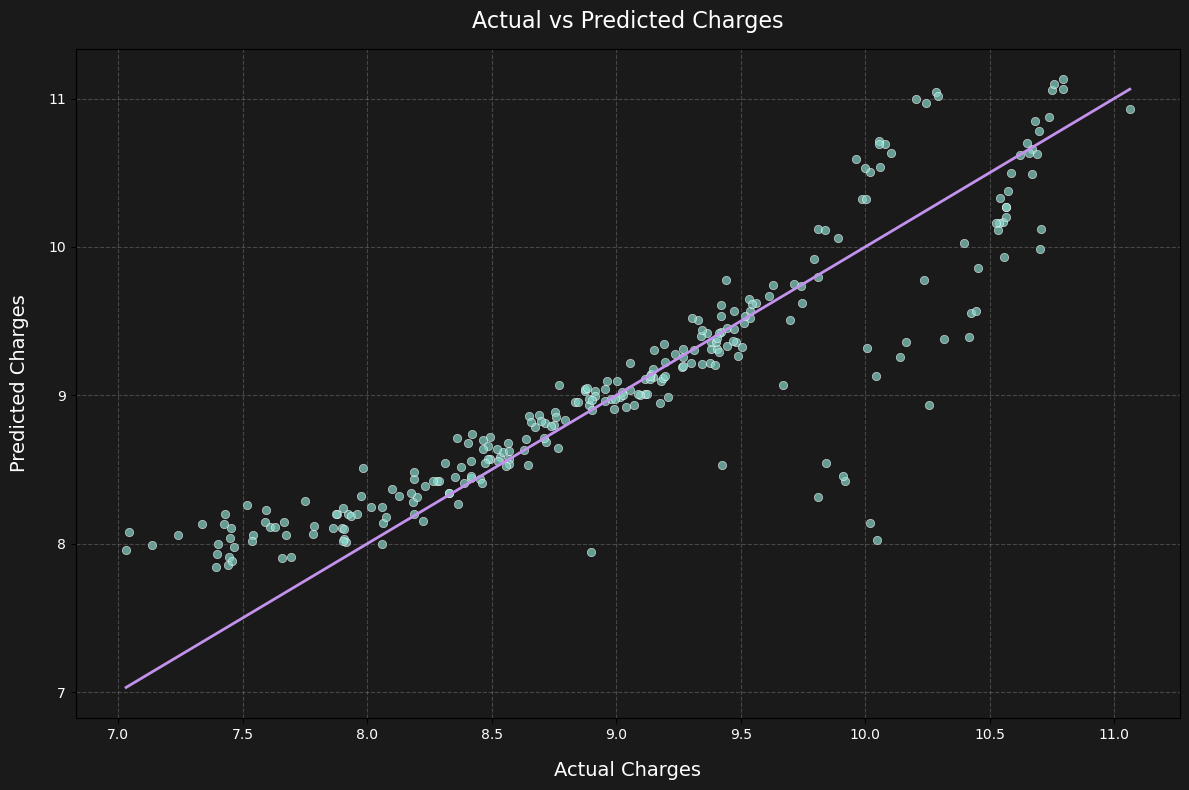

In [35]:
# Set a custom style
plt.style.use('default')
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor('#1a1a1a')
plt.gcf().set_facecolor('#1a1a1a')

# Plot actual vs predicted
plt.scatter(y_test, y_pred_log, color='#85d5c8', alpha=0.7, edgecolors='white', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='#c392ec', lw=2)

# Labels and title
plt.title('Actual vs Predicted Charges', fontsize=16, color='white', pad=15)
plt.xlabel('Actual Charges', fontsize=14, labelpad=14, color='white')
plt.ylabel('Predicted Charges', fontsize=14, labelpad=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Actual vs Predicted Charges (Log Scale)

This scatter plot visualizes the relationship between the actual and predicted values of medical charges in the **log-transformed scale**. Each point represents a single prediction from the test set.

- The diagonal line indicates perfect predictions — points that lie exactly on this line are predicted without error.
- The clustering of most points around the diagonal suggests the model captures the overall trend well, with minimal bias.
- Deviations from the line represent prediction errors. While most points are closely grouped, some outliers are visible, particularly at the higher charge range, which is expected due to the inherent variance in high-cost cases.

Overall, the plot confirms that the model performs well in predicting log-transformed charges, and errors appear to be reasonably distributed.

## Model Interpretation and Usefulness

The model makes sense in terms of interpretation — it aligns with expectations. Key predictors such as age, BMI, smoking status, and number of children appear to contribute meaningfully to the predicted medical charges. The log transformation applied to the target variable helped to stabilize variance and improve the model’s ability to capture relative differences rather than absolute errors, which is particularly useful when modeling skewed cost data like insurance charges.

In terms of predictive performance, the model seems reasonably good at estimating insurance losses, especially on the **log scale**, where the test R² reached **0.80**. This suggests that it explains 80% of the variance in log-transformed charges — a strong result for this kind of regression task. The effectiveness likely stems from both the feature set and the transformation of the skewed target distribution.

The Mean Squared Error (MSE) on the original scale was over $59 million, which might sound large but reflects the squared nature of the error term and the wide range of actual charge values. In practice, MSE is less intuitive to interpret directly in dollar terms, but it's useful as a penalty-based measure that emphasizes large errors. For an insurance company, this model would be quite helpful — especially when used to understand trends or forecast charges in bulk — though individual predictions would still require careful review for high-risk clients due to the potential for larger absolute deviations.

# Conclusion